In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path= '/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/Centrella_et_al_Data_Osmia_Path_2020-2.csv'

In [3]:
data = pd.read_csv(data_path)

# CDL covers
'Ag_1000m',
 'Forest_1000m',
 'Open_1000m',
 'Other_1000m',
 'ShrubWet_1000m',
 'Urban_1000m',
 'Apples_1000m'


 # pollen families - top 4
 Vitaceae
 Rhamnaceae
 Rosaceae
 Caprifoliaceae.


# pollen families 
'Prop_Vitaceae',
 'Prop_Caprifoliaceae',
 'Prop_Rhamnaceae',
 'Prop_Cornaceae',
 'Prop_Brassicaceae',
 'Prop_Oleaceae',
 'Prop_Adoxaceae',
 'Prop_Onagraceae',
 'Prop_Fabaceae',
 'Prop_Juglandaceae',
 'Prop_Rosaceae'

In [15]:
data1 = data[[
 'Ag_1000m',
 'Forest_1000m',
 'Open_1000m',
 'Other_1000m',
 'ShrubWet_1000m',
 'Urban_1000m',
 'Apples_1000m',
 'Prop_Vitaceae',
 'Prop_Caprifoliaceae',
 'Prop_Rhamnaceae',
 'Prop_Cornaceae',
 'Prop_Brassicaceae',
 'Prop_Oleaceae',
 'Prop_Adoxaceae',
 'Prop_Onagraceae',
 'Prop_Fabaceae',
 'Prop_Juglandaceae',
 'Prop_Rosaceae'
]]

data2 = data[[
    'Ag_1000m',
 'Forest_1000m',
 'Open_1000m',
 'Other_1000m',
 'ShrubWet_1000m',
 'Urban_1000m',
 'Apples_1000m',
 'Prop_Vitaceae',
 'Prop_Caprifoliaceae',
  'Prop_Rhamnaceae',
  'Prop_Rosaceae'

]]

                     Ag_1000m  Forest_1000m  Open_1000m  Other_1000m  \
Ag_1000m             1.000000     -0.457058   -0.325052    -0.159393   
Forest_1000m        -0.457058      1.000000   -0.048853    -0.145384   
Open_1000m          -0.325052     -0.048853    1.000000    -0.323891   
Other_1000m         -0.159393     -0.145384   -0.323891     1.000000   
ShrubWet_1000m      -0.406677      0.080616    0.154945     0.596117   
Urban_1000m         -0.395457     -0.509631    0.129750    -0.018757   
Apples_1000m         0.569379     -0.370747   -0.387667     0.157280   
Prop_Vitaceae       -0.235638     -0.187956    0.128632    -0.038342   
Prop_Caprifoliaceae  0.032907      0.098375    0.215374    -0.307770   
Prop_Rhamnaceae     -0.241854     -0.052322    0.157834     0.497285   
Prop_Rosaceae        0.433908      0.121280   -0.426726    -0.047192   

                     ShrubWet_1000m  Urban_1000m  Apples_1000m  Prop_Vitaceae  \
Ag_1000m                  -0.406677    -0.395457      

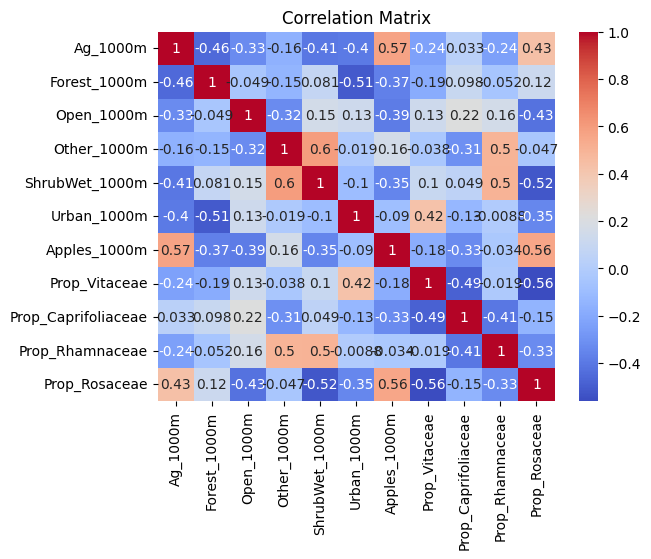

In [16]:
import seaborn as sns
correlation_matrix = data2.corr()
print(correlation_matrix)

import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
import statsmodels.api as sm

# Define the independent variables
X = data2[['Ag_1000m', 'Forest_1000m', 'Open_1000m', 'Other_1000m', 'ShrubWet_1000m', 'Urban_1000m', 'Apples_1000m']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = data2['Prop_Vitaceae']

# Create the GLM model
model = sm.GLM(y, X, family=sm.families.Gaussian())

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())
 

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Prop_Vitaceae   No. Observations:                   51
Model:                            GLM   Df Residuals:                       43
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                        0.085277
Method:                          IRLS   Log-Likelihood:                -5.2376
Date:                Fri, 18 Oct 2024   Deviance:                       3.6669
Time:                        19:27:27   Pearson chi2:                     3.67
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2309
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.329e+07   7.47e+07     -0.

In [22]:
# define function for shannon index

def shannon_index(ag, forest, open, other, shrubwet, urban, apples):
    # Calculate the total number of species
    total = ag + forest + open + other + shrubwet + urban + apples
    # Calculate the proportion of each species
    p_ag = ag / total
    p_forest = forest / total
    p_open = open / total
    p_other = other / total
    p_shrubwet = shrubwet / total
    p_urban = urban / total
    p_apples = apples / total
    # Calculate the Shannon index
    shannon = -p_ag * np.log(p_ag) - p_forest * np.log(p_forest) - p_open * np.log(p_open) - p_other * np.log(p_other) - p_shrubwet * np.log(p_shrubwet) - p_urban * np.log(p_urban) - p_apples * np.log(p_apples)
    return shannon

In [23]:
data2['Shannon'] = data2.apply(lambda x: shannon_index(x['Ag_1000m'], x['Forest_1000m'], x['Open_1000m'], x['Other_1000m'], x['ShrubWet_1000m'], x['Urban_1000m'], x['Apples_1000m']), axis=1)

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_90203/1182283944.py:15: RuntimeWarning: divide by zero encountered in log
  shannon = -p_ag * np.log(p_ag) - p_forest * np.log(p_forest) - p_open * np.log(p_open) - p_other * np.log(p_other) - p_shrubwet * np.log(p_shrubwet) - p_urban * np.log(p_urban) - p_apples * np.log(p_apples)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_90203/1182283944.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  shannon = -p_ag * np.log(p_ag) - p_forest * np.log(p_forest) - p_open * np.log(p_open) - p_other * np.log(p_other) - p_shrubwet * np.log(p_shrubwet) - p_urban * np.log(p_urban) - p_apples * np.log(p_apples)
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_90203/1081559342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [24]:
data2['Shannon']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     1.395489
7     1.395489
8     1.395489
9          NaN
10         NaN
11         NaN
12    1.395580
13    1.395580
14    1.395580
15         NaN
16         NaN
17         NaN
18    1.799277
19    1.799277
20    1.799277
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33    1.819064
34    1.819064
35    1.819064
36    1.339186
37    1.339186
38    1.339186
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45    1.269981
46    1.269981
47    1.269981
48         NaN
49         NaN
50         NaN
Name: Shannon, dtype: float64

In [2]:
#<--------------------------------- Pennsylvania Data ------------------------------------->

In [3]:
data_path = '/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points.csv'
data  = pd.read_csv(data_path)

In [4]:
data  = pd.read_csv(data_path)

In [9]:
data.head(1000)[['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_0_1000.csv', index=False)

In [10]:
data.iloc[1000:2000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_1000_2000.csv', index=False)

In [11]:
data.iloc[2000:3000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_2000_3000.csv', index=False)

In [12]:
data.iloc[3000:4000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_3000_4000.csv', index=False)

In [13]:
data.iloc[4000:5000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_4000_5000.csv', index=False)

In [14]:
data.iloc[5000:6000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_5000_6000.csv', index=False)

In [15]:
data.iloc[6000:7000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_6000_7000.csv', index=False)

In [16]:
len(data)

7452

In [17]:
data.iloc[7000:7452][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_7000_7452.csv', index=False)

In [32]:
data.iloc[6500:7000][['col','row','lon','lat']].to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_6500_7000.csv', index=False)

,Unnamed: 0,col,row,lon,lat
1000,1001,1105,197,-78.958333,41.708333
1001,1002,1106,197,-78.916667,41.708333
1002,1003,1107,197,-78.875000,41.708333
1003,1004,1108,197,-78.833333,41.708333
1004,1005,1109,197,-78.791667,41.708333
...,...,...,...,...,...
1995,1996,1168,204,-76.333333,41.416667
1996,1997,1169,204,-76.291667,41.416667
1997,1998,1170,204,-76.250000,41.416667
1998,1999,1171,204,-76.208333,41.416667


In [26]:
folder = '/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/data/forage'

In [27]:
import os

In [28]:
data = pd.DataFrame()
for file in os.listdir(folder):
    data = pd.concat([data, pd.read_csv(os.path.join(folder, file))])

In [35]:
data.to_csv('/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/data/forage.csv', index=False)

In [36]:
data.describe()

,lon,lat,col,row,year,Forage_spring_1km,Forage_spring_3km,Forage_spring_5km
count,117780.000000,117780.000000,117780.000000,117780.000000,117780.000000,117780.000000,117780.000000,117780.000000
mean,-77.784963,40.880903,1133.160893,216.858329,2015.481508,0.555044,0.554580,0.554614
std,1.601084,0.670072,38.426024,16.081723,4.635092,0.110309,0.093668,0.086587
min,-80.500000,39.708333,1068.000000,184.000000,2008.000000,0.000000,0.000000,0.000000
25%,-79.166667,40.291667,1100.000000,203.000000,2011.000000,0.493750,0.506250,0.512500
50%,-77.791667,40.875000,1133.000000,217.000000,2015.000000,0.578125,0.568750,0.568750
75%,-76.416667,41.458333,1166.000000,231.000000,2020.000000,0.643750,0.625000,0.618750
max,-74.708333,42.250000,1207.000000,245.000000,2023.000000,0.696875,0.693750,0.690625


<Axes: >

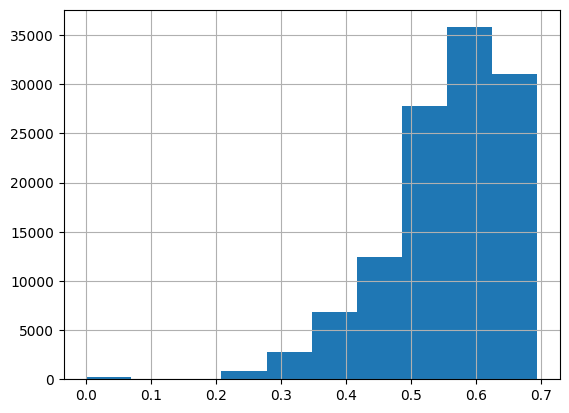

In [38]:
data['Forage_spring_3km'].hist()

In [39]:
# spring foraging quality less than 0.5 will get 1 egg and
# spring foraging quality greater than 0.5 will get 2 eggs

In [40]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [41]:
pa = gpd.read_file('/Users/edwardamoah/Downloads/PA County Boundaries Spatial Data Current Transportation_20241020/geo_export_6cef9481-2bbb-4662-924f-c066da87393b.shp')

<Axes: >

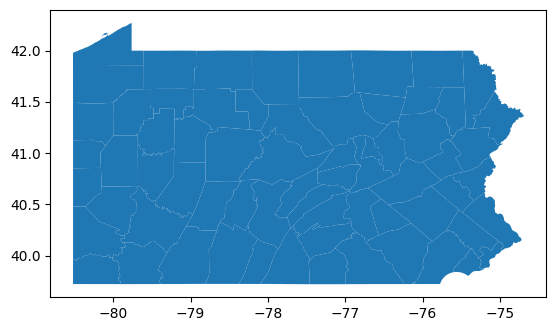

In [42]:
pa.plot()

In [63]:
data_path = '/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points.csv'
data  = pd.read_csv(data_path)

In [64]:
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))

In [65]:
pa_points = pa.sjoin(points, how='inner', op='intersects')

/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/edwardamoah/Documents/GitHub/OsmiaPopModel/osmiaPopModel_python/venv/lib/python3.12/site-packages/geopandas/geodataframe.py:2187: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [70]:
pa_center = pa_points.query(" county_nam == 'CENTRE'")[['col','row','lon','lat']]

In [62]:
pa_center.to_csv('/Users/edwardamoah/Documents/Dissertation/Osmia_Pop_Simulation/pennsylvania_prism_grid_points_centre_county.csv', index=False)

In [72]:
pa_center

,col,row,lon,lat
27,1129,221,-77.958333,40.708333
27,1130,221,-77.916667,40.708333
27,1131,220,-77.875000,40.750000
27,1133,220,-77.791667,40.750000
27,1139,219,-77.541667,40.791667
...,...,...,...,...
27,1126,211,-78.083333,41.125000
27,1128,211,-78.000000,41.125000
27,1130,210,-77.916667,41.166667
27,1129,209,-77.958333,41.208333
